In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [168]:
DATASET_PATH=""

In [169]:
data_df=pd.read_csv(DATASET_PATH)

In [170]:
data_df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [171]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


###### Rank is index+1 so we can drop it
#### There are null values in year,genre and publisher
#### Year has been parsed as float64 which must be converted to int64

In [172]:
#Start with indiviual analysis

#Drop the rank column
data_df.drop(['Rank'],axis=1,inplace=True)

In [173]:
def basic_analysis(frame,colname):
    currentcol=frame[colname]
    print("Total Unique value counts: \n")
    print(currentcol.value_counts())
    print("\n\nTotal Null values:")
    print(currentcol.isna().sum())
    print("\n\nUnique values: \n",len(currentcol.unique()))
    if currentcol.dtype == 'int64' or currentcol.dtype == 'float64':
        print("\n\nSkew: \n",currentcol.skew())
        print("\n\nMin: \n",currentcol.min())
        print("\n\nMax: \n",currentcol.max())

In [174]:
col_name='Name'
basic_analysis(data_df,col_name)

Total Unique value counts: 

Need for Speed: Most Wanted         12
Madden NFL 07                        9
Ratatouille                          9
LEGO Marvel Super Heroes             9
FIFA 14                              9
                                    ..
Games Explosion!                     1
Wii Music                            1
Memories Off                         1
Gabrielle's Ghostly Groove 3D        1
Pong / Asteroids / Yars' Revenge     1
Name: Name, Length: 11493, dtype: int64


Total Null values:
0


Unique values: 
 11493


3.0198352475127876

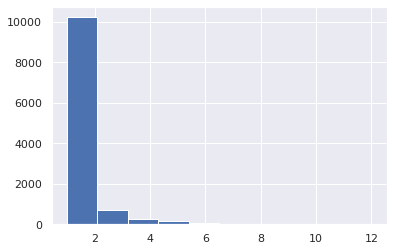

In [175]:
plt.hist(data_df[col_name].value_counts())
data_df[col_name].value_counts().skew()

#### There are total of 11493 games available
#### The data is right skewed which determines that most of the games have been released only for 2 platforms
#### Need for Speed is the game released for most of the platforms

In [176]:
col_name='Platform'
basic_analysis(data_df,col_name)

Total Unique value counts: 

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


Total Null values:
0


Unique values: 
 31


#### Most of the games have been released for DS,PS series,Wii,X360 and PC

In [177]:
col_name='Year'
basic_analysis(data_df,col_name)

Total Unique value counts: 

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64


Total Null values:
271


Unique values: 
 40


Skew: 
 -1.002560494621347


Min: 
 1980.0


Max: 
 2020.0


In [178]:
data_df[data_df[col_name] == 2020.0]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


###### This game has been released on 2009 and not in 2020.Replace the value
https://www.google.com/search?q=Imagine%3A+Makeup+Artist&oq=Imagine%3A+Makeup+Artist&aqs=chrome..69i57j69i58&sourceid=chrome&ie=UTF-8

In [179]:
data_df[col_name].replace(2020.0,2009.0,inplace=True)

In [180]:
#Get the percentage of null values
(data_df[col_name].isna().sum()*100)/data_df[col_name].shape[0]

1.6327268345583805

In [181]:
#Drop the na columns
data_df.dropna(inplace=True,axis=0)

In [182]:
basic_analysis(data_df,col_name)

Total Unique value counts: 

2009.0    1432
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
Name: Year, dtype: int64


Total Null values:
0


Unique values: 
 38


Skew: 
 -1.0044176712020416


Min: 
 1980.0


Max: 
 2017.0


In [183]:
data_df[col_name]=data_df[col_name].astype('int64')

(array([ 108.,   65.,   89.,  224., 1150., 1998., 2455., 5069., 3594.,
        1539.]),
 array([1980. , 1983.7, 1987.4, 1991.1, 1994.8, 1998.5, 2002.2, 2005.9,
        2009.6, 2013.3, 2017. ]),
 <BarContainer object of 10 artists>)

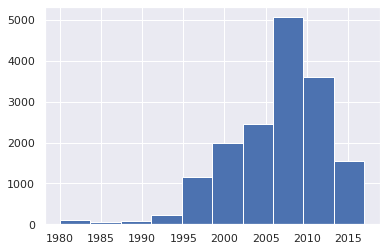

In [184]:
plt.hist(data_df[col_name])

#### Most of the games have been released in 1995 and 2015

In [185]:
col_name='Genre'
basic_analysis(data_df,col_name)

Total Unique value counts: 

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64


Total Null values:
0


Unique values: 
 12


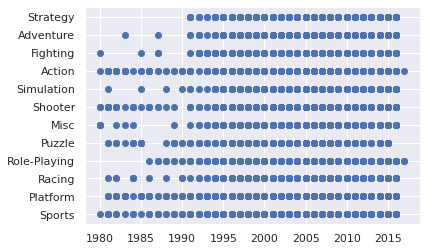

In [186]:
plt.scatter(data_df['Year'],data_df[col_name])

#### Strategy and Adventure games have been popular since 1991 and forwards
#### Sports game have always been popular
#### Action games are highly popular with Sports, Role-Playing ,Shooter and Adventure games following

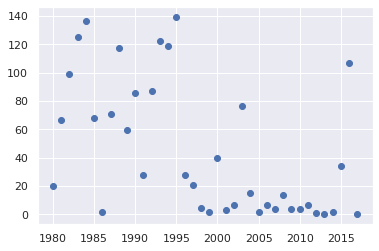

In [228]:
action_count=data_df[data_df['Genre'] == 'Action']
year_action=pd.concat([action_count.Global_Sales,action_count.Year],axis=1,keys=['Global_Sales','Year'])
plt.scatter(year_action.Year.unique(),year_action.groupby('Year').sum())

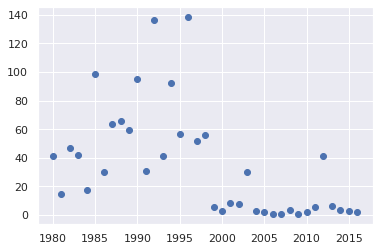

In [229]:
action_count=data_df[data_df['Genre'] == 'Sports']
year_action=pd.concat([action_count.Global_Sales,action_count.Year],axis=1,keys=['Global_Sales','Year'])
plt.scatter(year_action.Year.unique(),year_action.groupby('Year').sum())

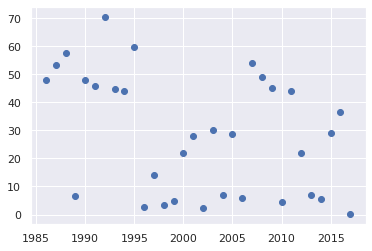

In [230]:
action_count=data_df[data_df['Genre'] == 'Role-Playing']
year_action=pd.concat([action_count.Global_Sales,action_count.Year],axis=1,keys=['Global_Sales','Year'])
plt.scatter(year_action.Year.unique(),year_action.groupby('Year').sum())

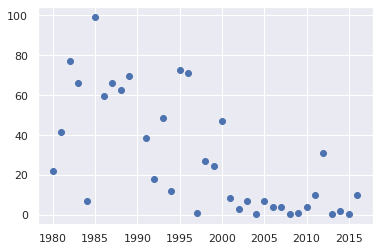

In [231]:
action_count=data_df[data_df['Genre'] == 'Shooter']
year_action=pd.concat([action_count.Global_Sales,action_count.Year],axis=1,keys=['Global_Sales','Year'])
plt.scatter(year_action.Year.unique(),year_action.groupby('Year').sum())

## Conclusion

##### 1.With recent trends the most popular genres of game are action,sports,Shooter
#### 2.The most selling platforms are DS,PS Series and XBox360 ,PSP, PC